# Tutorial: Automatic Differentiation with dual_autodiff

This tutorial demonstrates how to use the `dual_autodiff` package for automatic differentiation using dual numbers.

In [1]:
import dual_autodiff as df
import numpy as np
import matplotlib.pyplot as plt

## Basic Operations with Dual Numbers

Let's start by creating dual numbers and performing basic arithmetic operations.

In [4]:
# Create dual numbers
x = df.Dual(2.0, 1.0)  # represents 2 + ε
y = df.Dual(3.0, 1.0)  # represents 3 + ε

print(f"x = {x}")
print(f"y = {y}")

# Test basic operations
print(f"\nBasic operations:")
print(f"x + y = {x + y}")
print(f"x * y = {x * y}")
print(f"x / y = {x / y}")
print(f"x ** 2 = {x ** 2}")

x = Dual(2.0, 1.0)
y = Dual(3.0, 1.0)

Basic operations:
x + y = Dual(5.0, 2.0)
x * y = Dual(6.0, 5.0)
x / y = Dual(0.6666666666666666, 0.1111111111111111)
x ** 2 = Dual(4.0, 4.0)


## Automatic Differentiation Basics

The real power of dual numbers comes from automatic differentiation. Let's see how this works with a simple polynomial function: f(x) = x² + 2x + 1

The derivative of this function is f'(x) = 2x + 2, so we can verify our results.

In [5]:
def f(x):
    return x**2 + 2*x + 1

# Let's differentiate at x = 2
x_value = 2.0
derivative = df.autodiff(f, x_value)

print(f"For f(x) = x² + 2x + 1 at x = {x_value}:")
print(f"Actual derivative f'(x) = 2x + 2")
print(f"Calculated derivative = {derivative}")
print(f"Expected value f'({x_value}) = {2*x_value + 2}")

For f(x) = x² + 2x + 1 at x = 2.0:
Actual derivative f'(x) = 2x + 2
Calculated derivative = 6.0
Expected value f'(2.0) = 6.0


## Understanding How It Works

Let's see what's happening under the hood. When we use dual numbers, we're essentially evaluating the function at a point 'a' and getting both the function value and its derivative at that point.

For a dual number a + bε:
- The real part gives us f(a)
- The dual part gives us f'(a)⋅b

Let's demonstrate this by showing both parts of the dual number:

In [6]:
# Create a dual number for x = 2
x_dual = df.Dual(2.0, 1.0)  # 2 + ε
result = f(x_dual)

print(f"When evaluating f(x) = x² + 2x + 1 at x = 2 + ε:")
print(f"Result = {result}")
print(f"Function value (real part) = {result.real}")
print(f"Derivative (dual part) = {result.dual}")

When evaluating f(x) = x² + 2x + 1 at x = 2 + ε:
Result = Dual(9.0, 6.0)
Function value (real part) = 9.0
Derivative (dual part) = 6.0


## Trigonometric Functions

Our package also handles trigonometric functions. Let's visualize the derivative of sin(x) over a range of values and compare it with what we expect (cos(x)).

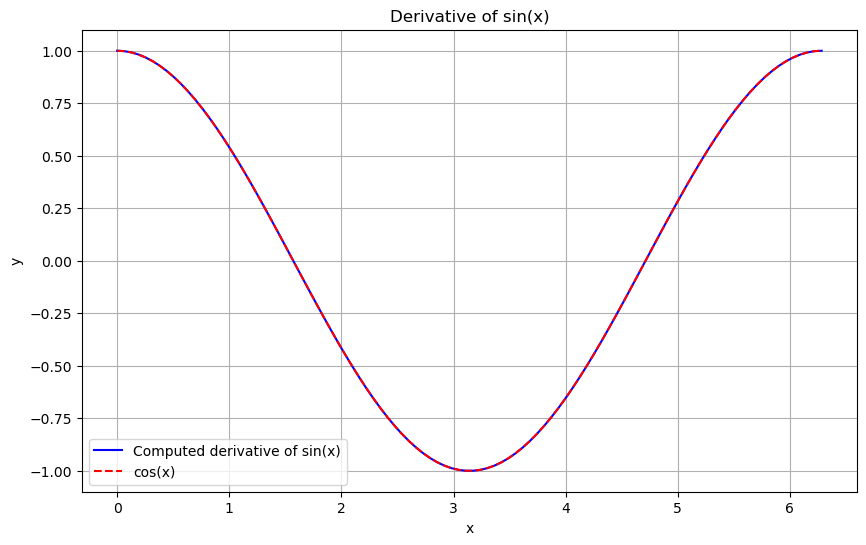

In [7]:
# Create a range of x values
x_values = np.linspace(0, 2*np.pi, 100)

# Calculate derivatives of sin(x)
derivatives = df.autodiff(lambda x: x.sin(), x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, derivatives, 'b-', label='Computed derivative of sin(x)')
plt.plot(x_values, np.cos(x_values), 'r--', label='cos(x)')
plt.grid(True)
plt.legend()
plt.title('Derivative of sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## The Coursework Example Function

Now let's tackle a more complex function: f(x) = log(sin(x)) + x²cos(x)

This function combines several operations:
1. Trigonometric functions (sin and cos)
2. Logarithm
3. Polynomial terms
4. Products of functions

We'll compare our automatic differentiation with numerical differentiation to show the advantages of our method.

In [8]:
def complex_function(x):
    """Our complex example: f(x) = log(sin(x)) + x²cos(x)"""
    return x.sin().log() + x**2 * x.cos()

# Evaluate at a specific point
x_test = 1.5
derivative = df.autodiff(complex_function, x_test)
print(f"At x = {x_test}:")
print(f"Derivative = {derivative}")

At x = 1.5:
Derivative = -1.9612372705533612


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Dropdown, VBox, HBox, Output
import ipywidgets as widgets
import dual_autodiff as df

# Let's define a set of interesting functions that demonstrate different properties
def linear(x):
    """f(x) = 2x + 1 - The simplest non-constant function"""
    return 2*x + 1

def quadratic(x):
    """f(x) = x² - 3x + 2 - A basic polynomial"""
    return x**2 - 3*x + 2

def sine_function(x):
    """f(x) = sin(2x) - A periodic function"""
    return x.sin() * 2

def compound_function(x):
    """f(x) = x²sin(x) - A product of polynomial and trigonometric function"""
    return x**2 * x.sin()

# Create a dictionary mapping function names to their implementations
function_dict = {
    'Linear (2x + 1)': linear,
    'Quadratic (x² - 3x + 2)': quadratic,
    'Sine (sin(2x))': sine_function,
    'Compound (x²sin(x))': compound_function
}

def create_interactive_plot():
    """Create an interactive visualization to explore automatic differentiation"""
    
    plot_output = Output()
    text_output = Output()
    
    # Create widgets
    function_dropdown = Dropdown(
        options=function_dict.keys(),
        description='Function:',
        value='Quadratic (x² - 3x + 2)'
    )
    
    x_range_slider = FloatSlider(
        value=2.0,
        min=0.5,
        max=4.0,
        step=0.1,
        description='Plot Range:',
        continuous_update=False
    )
    
    def update_plot(function_name, x_range):
        selected_function = function_dict[function_name]
        
        with plot_output:
            plot_output.clear_output(wait=True)
            
            # Create x values for plotting
            x = np.linspace(-x_range, x_range, 200)
            
            # Calculate derivatives using our dual_autodiff
            derivatives = df.autodiff(selected_function, x)
            
            # Calculate function values
            y_values = [selected_function(df.Dual(xi, 0)).real for xi in x]
            
            # Create the visualization
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
            
            # Plot original function
            ax1.plot(x, y_values, 'b-', label='Function')
            ax1.grid(True)
            ax1.set_title(f'Original Function: {function_name}')
            ax1.set_xlabel('x')
            ax1.set_ylabel('f(x)')
            ax1.legend()
            
            # Plot derivative
            ax2.plot(x, derivatives, 'r-', label='Derivative')
            ax2.grid(True)
            ax2.set_title('Derivative')
            ax2.set_xlabel('x')
            ax2.set_ylabel("f'(x)")
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
        
        # Display analytical information
        with text_output:
            text_output.clear_output(wait=True)
            x_test = 1.0  # Test point for detailed analysis
            derivative_at_point = df.autodiff(selected_function, x_test)
            print(f"\nAnalysis at x = {x_test}:")
            print(f"Function value: {selected_function(df.Dual(x_test, 0)).real:.4f}")
            print(f"Derivative value: {derivative_at_point:.4f}")
            
            # Add function-specific insights
            if function_name == 'Linear (2x + 1)':
                print("\nNote: The derivative is constant (2) as expected for a linear function!")
            elif function_name == 'Quadratic (x² - 3x + 2)':
                print("\nNote: The derivative is a linear function (2x - 3).")
            elif function_name == 'Sine (sin(2x))':
                print("\nNote: The derivative is 2cos(2x), another periodic function.")
            elif function_name == 'Compound (x²sin(x))':
                print("\nNote: The derivative combines the product rule and chain rule.")
    
    # Create interactive widget
    interact_auto = widgets.interactive(
        update_plot,
        function_name=function_dropdown,
        x_range=x_range_slider
    )
    
    # Layout the widgets and outputs
    controls = VBox([function_dropdown, x_range_slider])
    results = VBox([plot_output, text_output])
    
    return HBox([controls, results])

# Display the interactive analysis
display(create_interactive_plot())